In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [18]:
dataset = pd.read_csv('Datasets/feature_dataset.csv')

dataset = dataset.reset_index()

col_names = [ 
    "Home Team ELO", "Away Team ELO", "Home XG", "Away XG", 
    "Home XGA", "Away XGA", "Home Win Percentage", "Home Draw Percentage", 
    "Away Win Percentage", "Away Draw Percentage", "Head2Head Win", 
    "Head2Head Draw", "Winner"
]

dataset = dataset[col_names]
dataset.head()

,Home Team ELO,Away Team ELO,Home XG,Away XG,Home XGA,Away XGA,Home Win Percentage,Home Draw Percentage,Away Win Percentage,Away Draw Percentage,Head2Head Win,Head2Head Draw,Winner
0,1170,1041,54.21,33.84,40.90,55.94,64.43,20.61,30.43,28.70,0,0,-1
1,988,1016,38.63,37.45,53.75,51.46,23.93,27.21,26.46,25.25,0,0,0
2,763,1191,48.21,44.89,56.39,46.18,27.18,29.45,36.40,28.62,0,0,0
3,1002,1202,46.69,57.40,52.39,57.04,32.47,25.25,39.69,25.80,0,0,-1
4,865,926,45.73,65.26,32.79,46.99,30.29,24.48,21.74,26.09,0,0,-1


Accuracy: 0.5462555066079295

Feature Weights for Logistic Regression:
Home Team ELO: -0.0017234563683903913
Away Team ELO: 0.001862639133097297
Home XG: -0.009328247722949478
Away XG: 0.01066393130845751
Home XGA: 0.016670950517816918
Away XGA: -0.006947705998317783
Home Win Percentage: -0.009044172872464454
Home Draw Percentage: -0.010682667028292105
Away Win Percentage: -0.002605011541825108
Away Draw Percentage: -0.011509336385071494
Head2Head Win: 0.007688240941756477
Head2Head Draw: -0.0013331958346035943


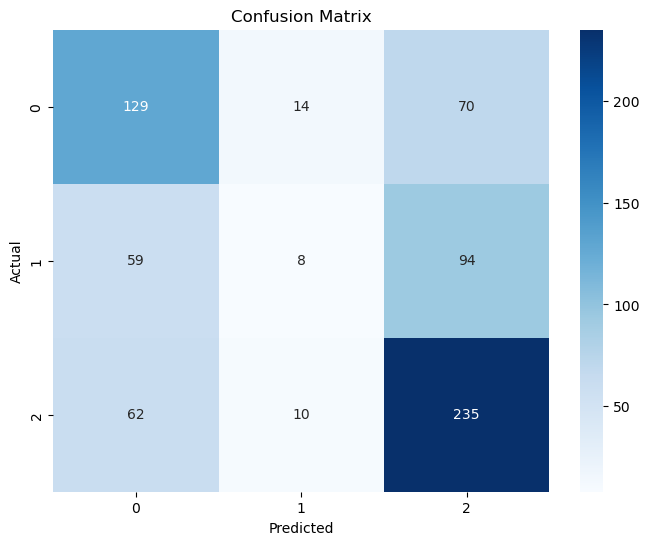

In [19]:
X = dataset.drop('Winner', axis=1)
y = dataset['Winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_regression_model = LogisticRegression(random_state=16, max_iter=10000, solver='saga')

logistic_regression_model.fit(X_train, y_train)

y_pred = logistic_regression_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

feature_weights = logistic_regression_model.coef_[0]
features = X.columns


print("\nFeature Weights for Logistic Regression:")
for feature, weight in zip(features, feature_weights):
    print(f"{feature}: {weight}")


from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

SVM Accuracy: 0.5447870778267254

Feature Weights for SVM (Linear Kernel):
Home Team ELO: -0.00096753639024564
Away Team ELO: 0.0009830378364596593
Home XG: -0.00543565801293896
Away XG: 0.005824240174052135
Home XGA: 0.009743580849852341
Away XGA: -0.006039948096429489
Home Win Percentage: -0.005430730510378227
Home Draw Percentage: -0.011346645576664413
Away Win Percentage: -0.001019528095461286
Away Draw Percentage: -0.006043179318910044
Head2Head Win: 0.004027274855785579
Head2Head Draw: -0.001072166748220445


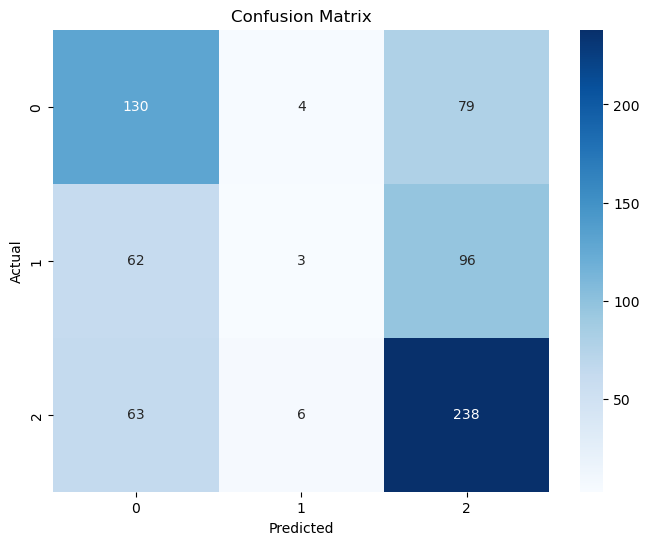

In [24]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Linear SVM model
svm_model = LinearSVC(random_state=16, max_iter=10000)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print('SVM Accuracy:', accuracy_svm)

# Get feature weights from Linear SVM
feature_weights = svm_model.coef_[0]
features = X.columns

print("\nFeature Weights for SVM (Linear Kernel):")
for feature, weight in zip(features, feature_weights):
    print(f"{feature}: {weight}")

# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Decision Tree Accuracy: 0.593245227606461

Feature Importances:
                 Feature  Importance
8    Away Win Percentage    0.150186
3                Away XG    0.130346
4               Home XGA    0.121603
2                Home XG    0.100659
0          Home Team ELO    0.093995
1          Away Team ELO    0.083465
7   Home Draw Percentage    0.072308
6    Home Win Percentage    0.066698
9   Away Draw Percentage    0.065486
5               Away XGA    0.059500
10         Head2Head Win    0.037189
11        Head2Head Draw    0.018565


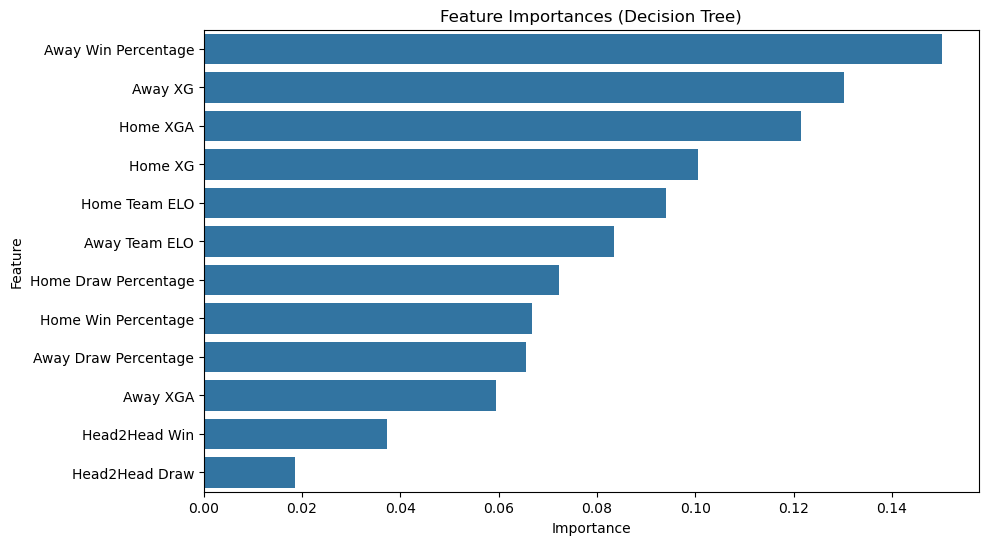

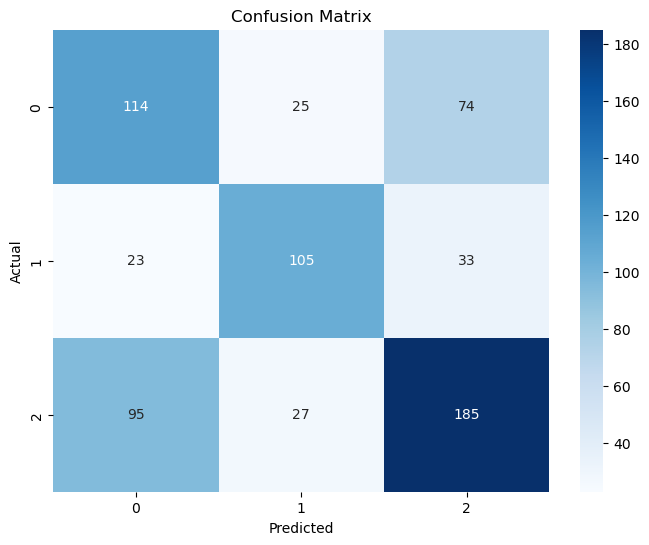

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=16)

# Train the model
decision_tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = decision_tree_model.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print('Decision Tree Accuracy:', accuracy_dt)

# Get feature importances
feature_importances = decision_tree_model.feature_importances_
features = X.columns

# Display feature importances
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(importance_df)

# Plot the top most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances (Decision Tree)')
plt.show()

# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Random Forest Accuracy: 0.7092511013215859

Random Forest Feature Importances:
                 Feature  Importance
4               Home XGA    0.134923
3                Away XG    0.132719
0          Home Team ELO    0.108688
1          Away Team ELO    0.102287
8    Away Win Percentage    0.085955
2                Home XG    0.077994
6    Home Win Percentage    0.077371
5               Away XGA    0.077008
9   Away Draw Percentage    0.066963
7   Home Draw Percentage    0.063075
10         Head2Head Win    0.039115
11        Head2Head Draw    0.033903


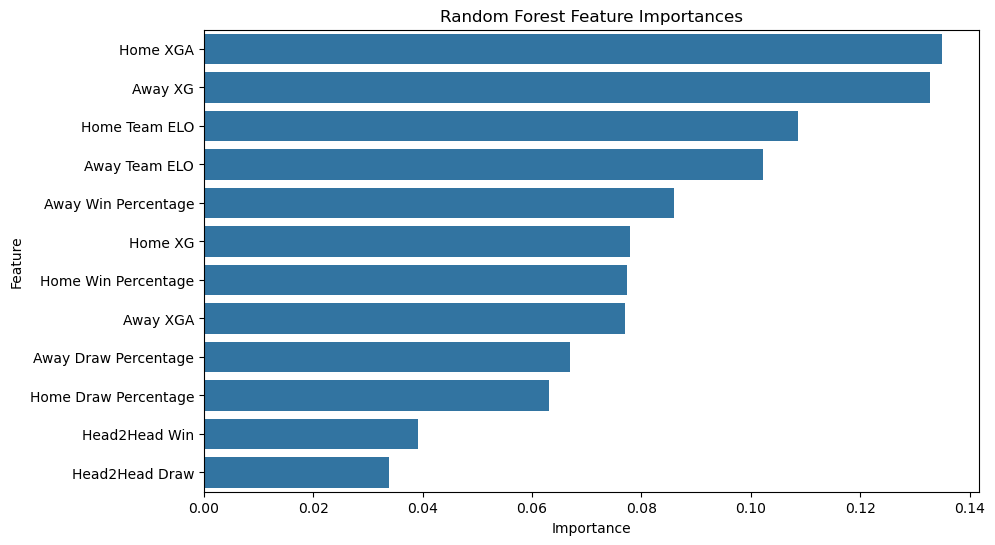

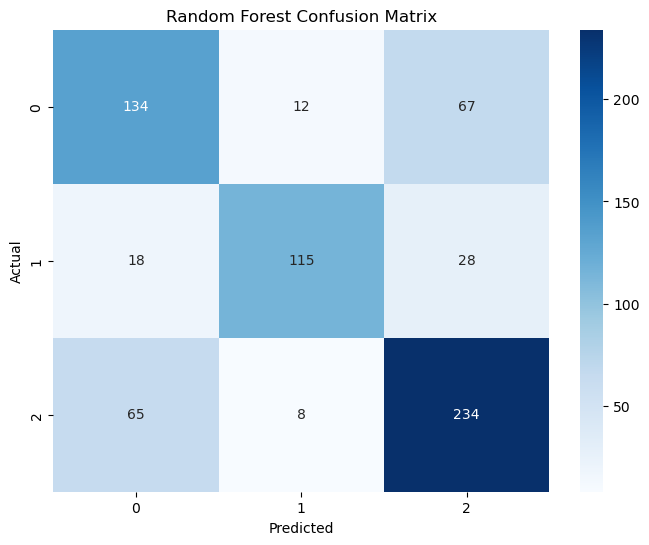

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(random_state=16, n_estimators=1000)

# Train the model
random_forest_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('Random Forest Accuracy:', accuracy_rf)

# Get feature importances
feature_importances_rf = random_forest_model.feature_importances_
features = X.columns

# Display feature importances
importance_df_rf = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances_rf
}).sort_values(by='Importance', ascending=False)

print("\nRandom Forest Feature Importances:")
print(importance_df_rf)

# Plot the top most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_rf)
plt.title('Random Forest Feature Importances')
plt.show()

# Confusion matrix for Random Forest
cnf_matrix_rf = metrics.confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()